In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot
from imblearn.over_sampling import BorderlineSMOTE

In [2]:
df = pd.read_excel("Final_Data.xlsx")

In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [4]:
def convertoLetter(x):
    if(0 <= x < 5):
        return "0"
    elif (5 <= x < 6):
        return "1"
    elif (6 <= x < 7):
        return "2"
    elif (7 <= x < 8.5):
        return "3"
    elif (8.5 <= x < 10):
        return "4"
    else: 
        return "0"

In [5]:
df["EE4_GPA"] = df["EE4"].apply(convertoLetter)

In [6]:
df = df.drop(["EE4"], axis = 'columns') 
corr = df.corr()

<AxesSubplot:>

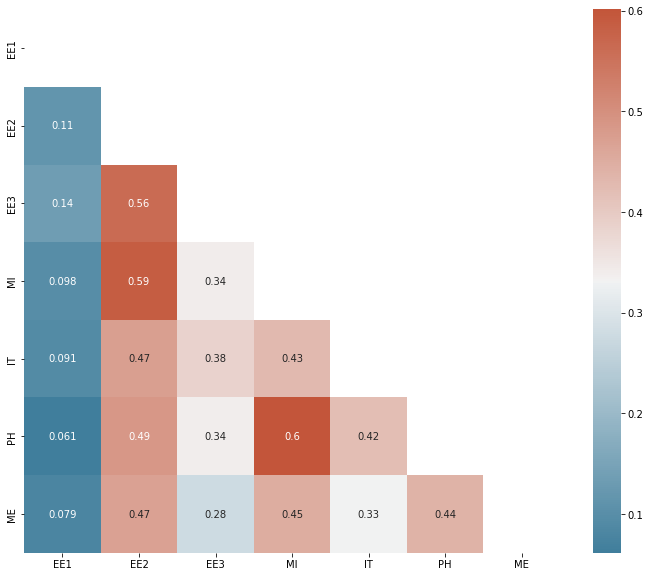

In [7]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

Class=3, n=199 (55.899%)
Class=4, n=60 (16.854%)
Class=2, n=69 (19.382%)
Class=0, n=6 (1.685%)
Class=1, n=22 (6.180%)


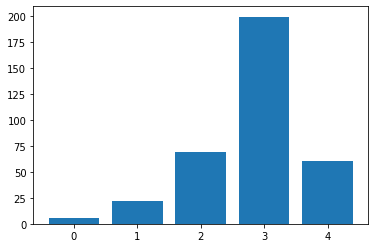

In [8]:
data = df.values
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Resampled dataset shape Counter({'3': 199, '4': 199, '2': 199, '0': 199, '1': 199})
Class=3, n=199 (20.000%)
Class=4, n=199 (20.000%)
Class=2, n=199 (20.000%)
Class=0, n=199 (20.000%)
Class=1, n=199 (20.000%)


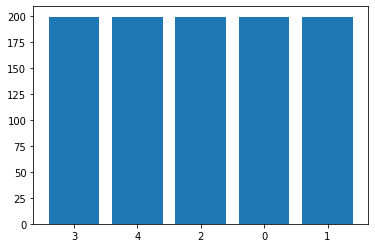

In [9]:
X, y = data[:, :-1], data[:, -1]
sm = BorderlineSMOTE(random_state=42)
X_Borderline, y_Borderline = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_Borderline))
# summarize distribution
counter_Borderline = Counter(y_Borderline)
for k,v in counter_Borderline.items():
	per = v / len(y_Borderline) * 100
	print('Class=%s, n=%s (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter_Borderline.keys(), counter_Borderline.values())
pyplot.show()

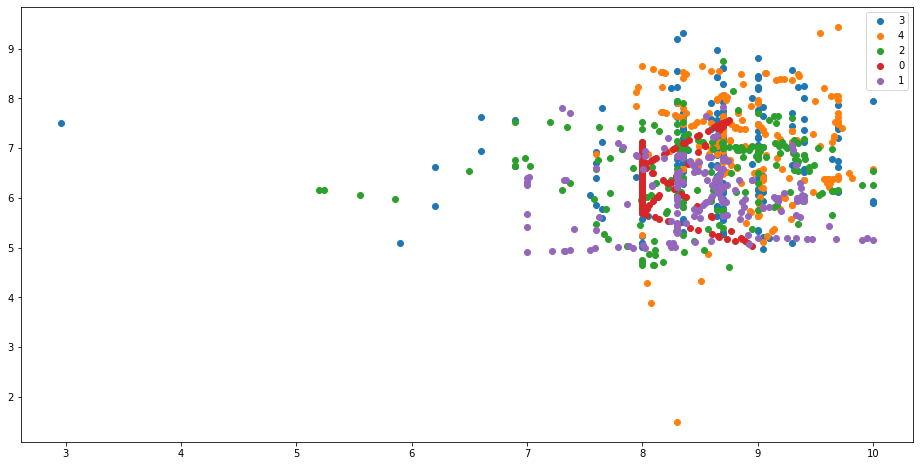

In [10]:
plt.figure(1, figsize = (16, 8))
for label, _ in counter_Borderline.items():
    row = np.where(y_Borderline == label)[0]
    plt.scatter(X_Borderline[row, 0], X_Borderline[row, 1], label = str(label))
plt.legend()

In [11]:
SMOTE_Border = pd.DataFrame()
SMOTE_Border = pd.DataFrame(X_Borderline, columns = ["EE1", "EE2", "EE3", "MI", "IT", "PH", "ME"])
SMOTE_Border["EE4_GPA"] = y_Borderline

In [12]:
SMOTE_Border.to_excel("SMOTE_Borderline_Data.xlsx")